# Let's take a picture of a tetris board and find the pieces

Rough steps/ingredients:
- ID the board area and on deck regions of image
    - Segmentation?
- ID the pieces in each region
- Derive properties of current board
    - how many full rows?
    - Current score?

## OpenCV things to try:
- optical flow for dropping blocks
- train a haar cascade to detect tetrionimos
    - https://pythonprogramming.net/haar-cascade-object-detection-python-opencv-tutorial/
- https://medium.com/analytics-vidhya/introduction-to-opencv-cc771730577a
    

{'size': 1135326, 'shape': (866, 437, 3), 'type': dtype('uint8')}


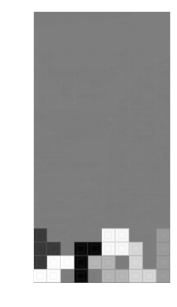

In [41]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.figure(figsize = (5,5))

# For interactive plotting:
# %matplotlib widget

img = cv2.imread("crop-screencap.png")
print({"size": img.size,"shape": img.shape,"type": img.dtype})
# Converting to different color spaces
grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
colorimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Splitting out color channels
b,g,r = cv2.split(img)
h,s,v = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2HSV))
l,a,bb = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2LAB))
y,cr,cb = cv2.split(cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb))



#plt.imshow(colorimg)
plt.imshow(bb, cmap='gray')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


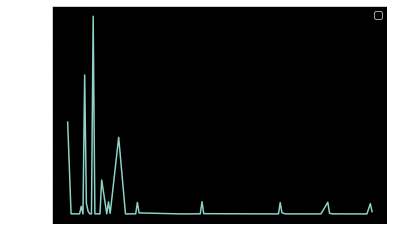

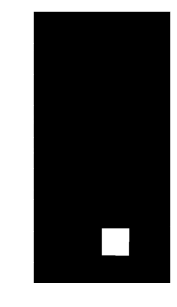

In [79]:
# _, threshold = cv2.threshold(h, 100, 150, cv2.THRESH_BINARY)
# threshold = cv2.inRange(cb, 70, 85)
plot_img_histograms([h])

# threshold = cv2.inRange(bb, 0, 90) #j
# threshold = cv2.inRange(h, 150, 154) #t
# threshold = cv2.inRange(h, 23, 25) #0
threshold = cv2.inRange(h, 23, 25) #0
plt.figure(figsize = (5,5))
plt.imshow(threshold, cmap='gray')




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


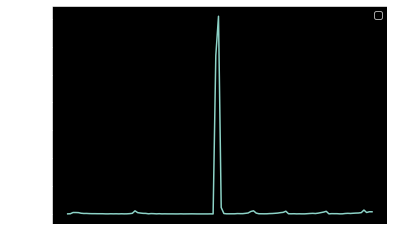

In [42]:

def plot_img_histograms(colorspaces : list):
    for color in colorspaces:
        data = np.unique(color, return_counts=True)
        # plt.xlim([0, 256])
        plt.legend()
        plt.plot(data[0], data[1])

plot_img_histograms([bb])

(0.0, 256.0)

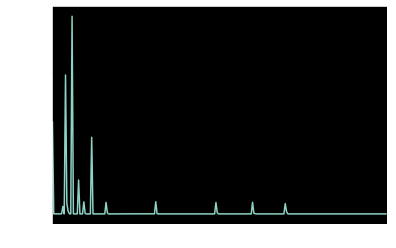

In [3]:
# plt.figure(figsize = (20,10))
hist = cv2.calcHist([h], [0], None, [256], [0, 256])
plt.plot(hist)
plt.xlim([0, 256])

In [72]:
hdata

(array([  0,   2,   3,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  23,  24,  25,  30,  34,  36,  37,  38,
         39,  40,  41,  42,  66,  70,  71,  72,  75,  76,  77,  78,  79,
         80, 122, 123, 124, 125, 126, 128, 132, 135, 138, 143, 144, 147,
        148, 149, 153, 154, 155, 156, 157, 158, 159, 162, 163, 170, 175,
        176, 178, 179], dtype=uint8),
 array([ 54562,     29,     64,      7,     42,   4469,      7,  82613,
          6267,   1605,     63,      9, 117531,     42,     30,     39,
             6,  20131,     24,   7175,    299,  45544,     14,      1,
            27,     45,     34,      9,   6832,    607,      4,      7,
             1,     20,     56,     64,     72,     45,   7235,    151,
             1,     41,      1,   6754,    728,     14,     10,     16,
             2,      3,      1,      1,      1,     40,   6929,    399,
           140,     19,     37,      1,      1,     41,      1,      1,
             1,      

In [ ]:

color_thresholds = {
"O": [],
"I": [],
"S": [],
"Z": [],
"L": [],
"J": [90, 120, "bb"],
"T": []
}

def split_tetronimos(img: np.ndarray, thresholds : dict, tetronimo = None):
    for name, t in thresholds.items():
        cv2.threshold(bb, t[0], t[1], cv2.THRESH_BINARY)[1]

In [82]:
h[-10]

array([  0,  39,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        41,  41,  41,  41,  41,  42,  41,  41,  41,  41,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,  41,
        41,  41,  41,  41,  41,  41,  41,  41,  41,  42,   0,   0,   0,
         0,  15,  15,  15,  15,  15,  15,  15,  15,  15,  15,   0,  15,
        15,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,   0,
         0, 125, 125, 125, 125, 125, 125, 125, 125, 125, 126, 125, 125,
       125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125, 125,
       126, 125, 125, 125, 125, 125, 125, 126, 125, 126, 125, 125, 125,
       125, 125, 125, 126, 126, 126,  15,  15,  15,  15,  15,  1

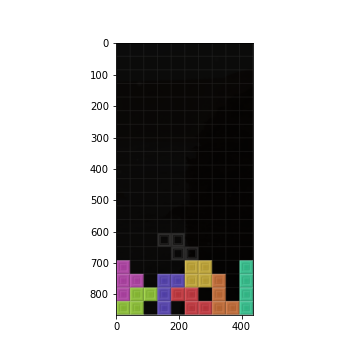

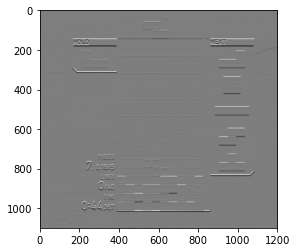

In [23]:
sobelx = cv2.Sobel(grayimg,cv2.CV_64F,1,0,ksize=9)
sobely = cv2.Sobel(grayimg,cv2.CV_64F,0,1,ksize=9)
plt.imshow(sobely,cmap = 'gray')

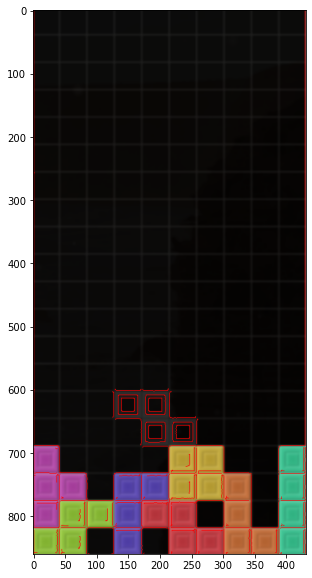

In [48]:
th1=40
th2=60 # Canny recommends threshold 2 is 3 times threshold 1 - you could try experimenting with this...
d=3 # gaussian blur

edgeresult=img.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]

gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

edge = cv2.Canny(gray, th1, th2)

edgeresult[edge != 0] = (0, 0, 255) # this takes pixels in edgeresult where edge non-zero colours them bright green
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(edgeresult, cv2.COLOR_BGR2RGB))

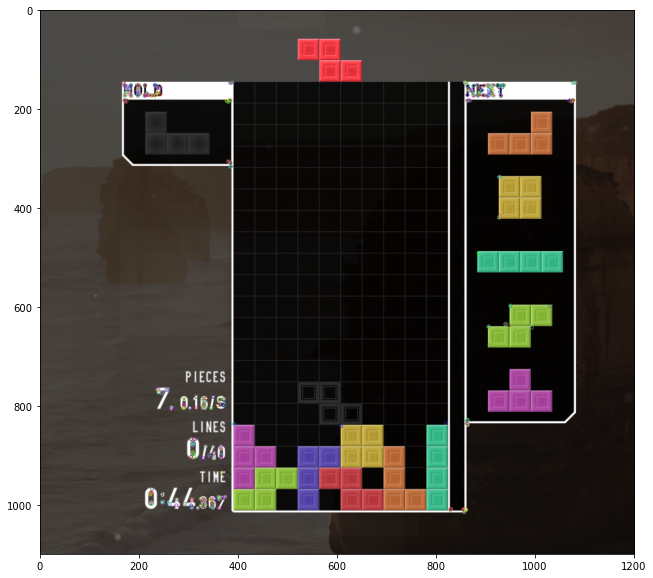

In [26]:
orbimg=img.copy()

orb = cv2.ORB_create()
# find the keypoints with ORB
kp = orb.detect(orbimg,None)
# compute the descriptors with ORB
kp, des = orb.compute(orbimg, kp)
# draw keypoints
cv2.drawKeypoints(orbimg,kp,orbimg)
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(orbimg, cv2.COLOR_BGR2RGB))

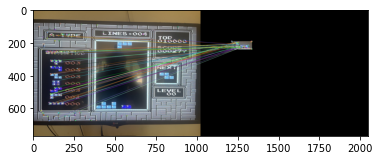

In [31]:
img2match=np.zeros(img.shape,np.uint8)
dogface=img[190:240, 500:625] # copy out a bit
img2match[190:240, 500:625]=[0,0,0] # blank that region
dogface=cv2.flip(dogface,0) #flip the copy
img2match[190:190+dogface.shape[0], 190:190+dogface.shape[1]]=dogface # paste it back somewhere else
plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

kp2 = orb.detect(img2match,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img2match, kp2)
# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,des2)
 
# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 50 matches.
oimg = cv2.drawMatches(orbimg,kp,img2match,kp2,matches[:50], orbimg)
 
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))

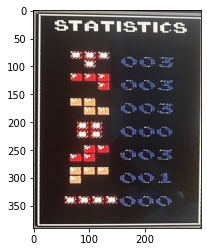

In [4]:
lpiece = img[193:237, 513:606]
plt.imshow(lpiece)
cube = (img[194:216, 513:546])
plt.imshow(cube)
stats = img[230:620, 40:340]
plt.imshow(stats)

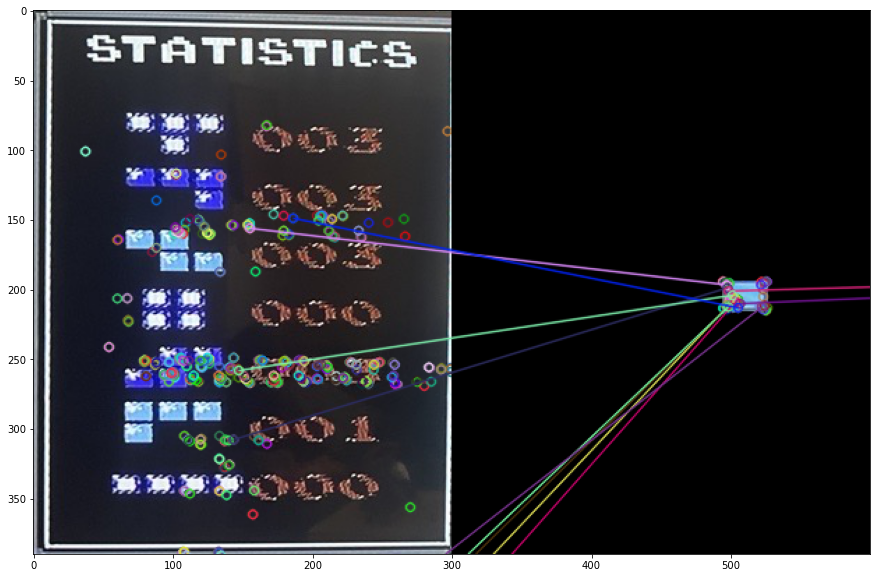

In [80]:
img2match=np.zeros(stats.shape,np.uint8)
dogface=cube # copy out a bit
img2match[194:216, 513:546]=[0,0,0] # blank that region
dogface=cv2.flip(dogface,0) #flip the copy
img2match[194:194+dogface.shape[0], 194:194+dogface.shape[1]]=dogface # paste it back somewhere else
# plt.imshow(cv2.cvtColor(img2match, cv2.COLOR_BGR2RGB))

orbimg = stats.copy()
#orbimg=img.copy()
kp2 = orb.detect(img2match,None)
# compute the descriptors with ORB
kp2, des2 = orb.compute(img2match, kp2)
# create BFMatcher object: this is a Brute Force matching object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des,des2)
 
# Sort them by distance between matches in feature space - so the best matches are first.
matches = sorted(matches, key = lambda x:x.distance)
 
# Draw first 50 matches.
oimg = cv2.drawMatches(orbimg,kp,img2match,kp2,matches[:50], orbimg)
 
plt.figure(figsize = (20,10))
plt.imshow(cv2.cvtColor(oimg, cv2.COLOR_BGR2RGB))

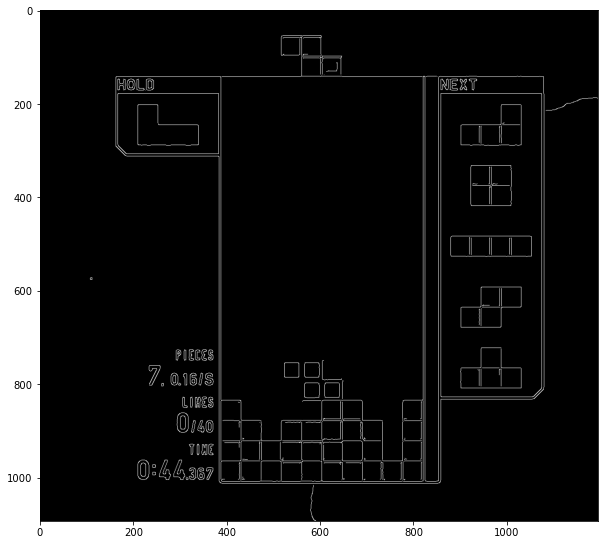

In [35]:
# reading image
#img = cv2.imread('sample-board.png')
# converting image into grayscale image
d=3 # gaussian blur

edgeresult=img.copy()
edgeresult = cv2.GaussianBlur(edgeresult, (2*d+1, 2*d+1), -1)[d:-d,d:-d]
gray = cv2.cvtColor(edgeresult, cv2.COLOR_BGR2GRAY)

# setting threshold of gray image
# _, threshold = cv2.threshold(gray, 50, 230, cv2.THRESH_BINARY)
th1=40
th2=70
canny = cv2.Canny(gray, th1, th2)
plt.figure(figsize = (10,20))
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))


In [ ]:

# # using a findContours() function
# contours, _ = cv2.findContours(
#     threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# i = 0
  
# # list for storing names of shapes
# for contour in contours:
  
#     # here we are ignoring first counter because 
#     # findcontour function detects whole image as shape
#     if i == 0:
#         i = 1
#         continue
  
#     # cv2.approxPloyDP() function to approximate the shape
#     approx = cv2.approxPolyDP(
#         contour, 0.01 * cv2.arcLength(contour, True), True)
      
#     # using drawContours() function
#     cv2.drawContours(stats, [contour], 0, (0, 0, 255), 1)
  
    # # finding center point of shape
    # M = cv2.moments(contour)
    # if M['m00'] != 0.0:
    #     x = int(M['m10']/M['m00'])
    #     y = int(M['m01']/M['m00'])
  
    # # putting shape name at center of each shape
    # if len(approx) == 3:
    #     cv2.putText(img, 'Triangle', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    # elif len(approx) == 4:
    #     cv2.putText(img, 'Quadrilateral', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    # elif len(approx) == 5:
    #     cv2.putText(img, 'Pentagon', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    # elif len(approx) == 6:
    #     cv2.putText(img, 'Hexagon', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    # else:
    #     cv2.putText(img, 'circle', (x, y),
    #                 cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
# displaying the image after drawing contours
#cv2.imshow('shapes', img)
  
# plt.figure(figsize = (20,10))
# plt.imshow(cv2.cvtColor(stats, cv2.COLOR_BGR2RGB))